In [1]:
from pyglotaran_extras import plot_data_overview
from pyglotaran_extras.io.load_data import load_data
from glotaran.utils.ipython import display_file
from glotaran.project.scheme import Scheme
from glotaran.optimization.optimize import optimize
from pyglotaran_extras import plot_overview
from pyglotaran_extras import plot_fitted_traces, select_plot_wavelengths

(<Figure size 1080x720 with 5 Axes>,
 (<AxesSubplot:xlabel='time', ylabel='spectral'>,
  <AxesSubplot:title={'center':'data. LSV'}, xlabel='time', ylabel='data_left_singular_vectors'>,
  <AxesSubplot:title={'center':'data. log(SV)'}, xlabel='singular_value_index', ylabel='data_singular_values'>,
  <AxesSubplot:title={'center':'data. RSV'}, xlabel='spectral', ylabel='data_right_singular_vectors'>))

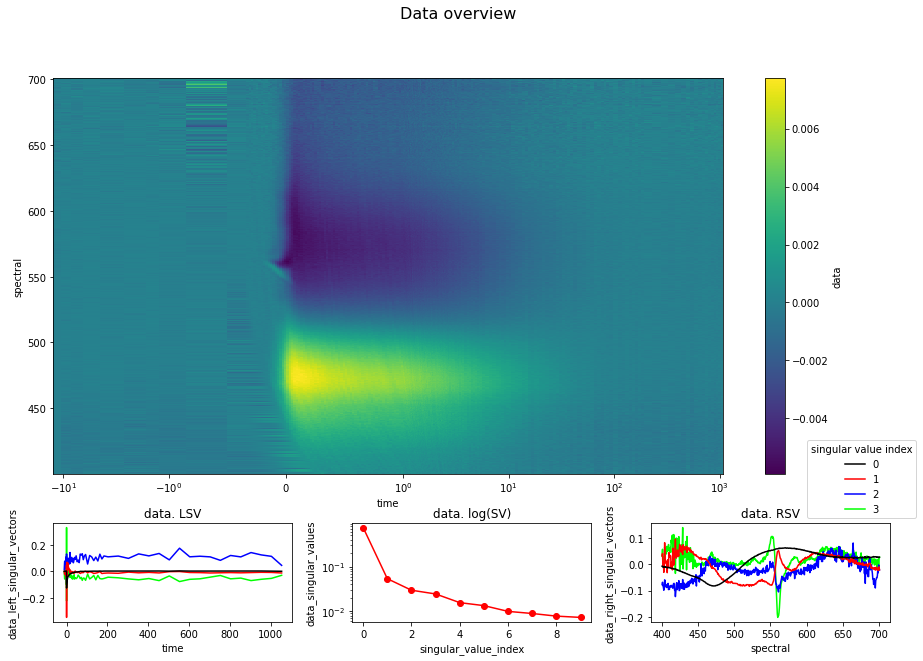

In [2]:
#读取数据
data_path = r"E:\proteinspectrumdeal\TAcsvdata\temp-m2-560nm-200nJ-de.ascii"
dataset = load_data(data_path)
#dataset=dataset.data[20:,:620]
plot_data_overview(dataset, nr_of_data_svd_vectors=4,linlog=True)

In [3]:
global_model_path = "model/four-global-model.yml"
global_parameters_path = "model/four-global-parameters.yml"

In [4]:
display_file(global_model_path, syntax="yaml")

```yaml
default_megacomplex: decay

dataset_groups:
  default:
    residual_function: variable_projection

dataset:
  data:
    initial_concentration: input1
    megacomplex: [mc1]
    irf: irf1

initial_concentration:
  input1:
    compartments: [s1, s2, s3, s4]
    parameters: [
      input.1,
      input.0,
      input.0,
      input.0,
      ]

megacomplex:
  mc1:
    k_matrix: [km1]

k_matrix:
  km1:
    matrix:
      (s2, s1): kinetic.1
      (s3, s2): kinetic.2
      (s4, s3): kinetic.3
      (s4, s4): kinetic.4


      

irf:
  irf1:
    type: spectral-multi-gaussian
    center: [irf.center]
    width: [irf.width]
    #dispersion_center: irf.dispc
    #center_dispersion_coefficients: [irf.disp1]


    # backsweep: False


```

In [5]:
display_file(global_parameters_path, syntax="yaml")

```yaml
input:
  - ["1", 1]
  - ["0", 0]
  - {vary: false}


irf:
  - ["center", 0.01]
  - ["width", 0.15]
  #- ["dispc", 560.0, {vary: false}]
  #- ["disp1", 0.01, {vary: false}]
  # - ["disp2", -2.85, {vary: false}]
#  - ["backsweep", 13200.0, {vary: false}]

kinetic:
  - ["1",1.0]
  - ["2",0.1]
  - ["3",0.01]
  - ["4",0.001]
  #- {non-negative: true}

```

In [6]:
global_scheme = Scheme(model=global_model_path,parameters=global_parameters_path,data={"data": dataset},
                 maximum_number_function_evaluations=3)
#maximum_number_function_evaluations=11控制拟合次数
#检查模型是否存在问题
global_scheme.validate()

'Your model is valid.'

In [7]:
global_result = optimize(global_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.4261e-03                                    3.53e-02    
       1              2         3.3077e-03      2.12e-03       2.77e-01       5.42e-02    
       2              3         2.2110e-03      1.10e-03       5.91e-01       1.25e-02    
The maximum number of function evaluations is exceeded.
Function evaluations 3, initial cost 5.4261e-03, final cost 2.2110e-03, first-order optimality 1.25e-02.


In [8]:
compartments = global_scheme.model.initial_concentration["input1"].compartments

global_scheme.model.k_matrix["km1"].matrix_as_markdown(compartments).replace(
    "0.0000e+00", ""
)

| compartment | s1 | s2 | s3 | s4
|---|---|---|---|---
| s1 |  |  |  | |
| s2 | kinetic.1 |  |  | |
| s3 |  | kinetic.2 |  | |
| s4 |  |  | kinetic.3 | kinetic.4|


In [9]:
global_result

| Optimization Result           |          |
|-------------------------------|----------|
| Number of residual evaluation | 3        |
| Number of parameters          | 6        |
| Number of datapoints          | 111538   |
| Degrees of freedom            | 111532   |
| Chi Square                    | 4.42e-03 |
| Reduced Chi Square            | 3.96e-08 |
| Root Mean Square Error (RMSE) | 1.99e-04 |

### Model

_Megacomplex Types_: decay

#### Dataset Groups

* **default**:
  * *Label*: default
  * *residual_function*: variable_projection
  * *link_clp*: None

#### K Matrix

* **km1**:
    * *Label*: km1
    * *Matrix*: 
      * ('s2', 's1'): kinetic.1(1.34e+00±9.38e-03, t-value: 143, initial: 1.00e+00)
      * ('s3', 's2'): kinetic.2(1.47e-01±1.27e-03, t-value: 116, initial: 1.00e-01)
      * ('s4', 's3'): kinetic.3(2.22e-02±4.36e-04, t-value: 51, initial: 1.00e-02)
      * ('s4', 's4'): kinetic.4(1.88e-05±3.12e-05, t-value: 0.6, initial: 1.00e-03)
  

#### Initial Concentration

* **input1**:
    * *Label*: input1
    * *Compartments*: 
      * s1
      * s2
      * s3
      * s4
    * *Parameters*: 
      * input.1(1.00e+00, fixed)
      * input.0(0.00e+00, fixed)
      * input.0(0.00e+00, fixed)
      * input.0(0.00e+00, fixed)
    * *Exclude From Normalize*: 
  

#### Irf

* **irf1** (spectral-multi-gaussian):
    * *Label*: irf1
    * *Type*: spectral-multi-gaussian
    * *Center*: 
      * irf.center(-2.65e-02±1.76e-04, t-value: -1.5e+02, initial: 1.00e-02)
    * *Width*: 
      * irf.width(7.08e-02±2.28e-04, t-value: 311, initial: 1.50e-01)
    * *Normalize*: True
    * *Backsweep*: False
    * *Center Dispersion Coefficients*: 
    * *Width Dispersion Coefficients*: 
    * *Model Dispersion With Wavenumber*: False
  

#### Megacomplex

* **mc1** (None):
    * *Label*: mc1
    * *Dimension*: time
    * *K Matrix*: 
      * km1
  

#### Dataset

* **data**:
    * *Label*: data
    * *Group*: default
    * *Megacomplex*: 
      * mc1
    * *Initial Concentration*: input1
    * *Irf*: irf1
  



In [10]:
global_result.optimized_parameters

  * __input__:

    |   _Label_ |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    |         1 | 1.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |
    |         0 | 0.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |

  * __irf__:

    | _Label_   |    _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|------------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    | center    | -2.650e-02 |          1.756e-04 |  -1.5e+02   |        -inf |         inf | True     | False            | `None`         |
    | width     |  7.075e-02 |          2.275e-04 |  311        |        -inf |         inf | True     | False            | `None`         |

  * __kinetic__:

    |   _Label_ |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    |         1 | 1.341e+00 |          9.378e-03 |  143        |        -inf |         inf | True     | False            | `None`         |
    |         2 | 1.473e-01 |          1.272e-03 |  116        |        -inf |         inf | True     | False            | `None`         |
    |         3 | 2.222e-02 |          4.364e-04 |  51         |        -inf |         inf | True     | False            | `None`         |
    |         4 | 1.883e-05 |          3.122e-05 |  0.6        |        -inf |         inf | True     | False            | `None`         |



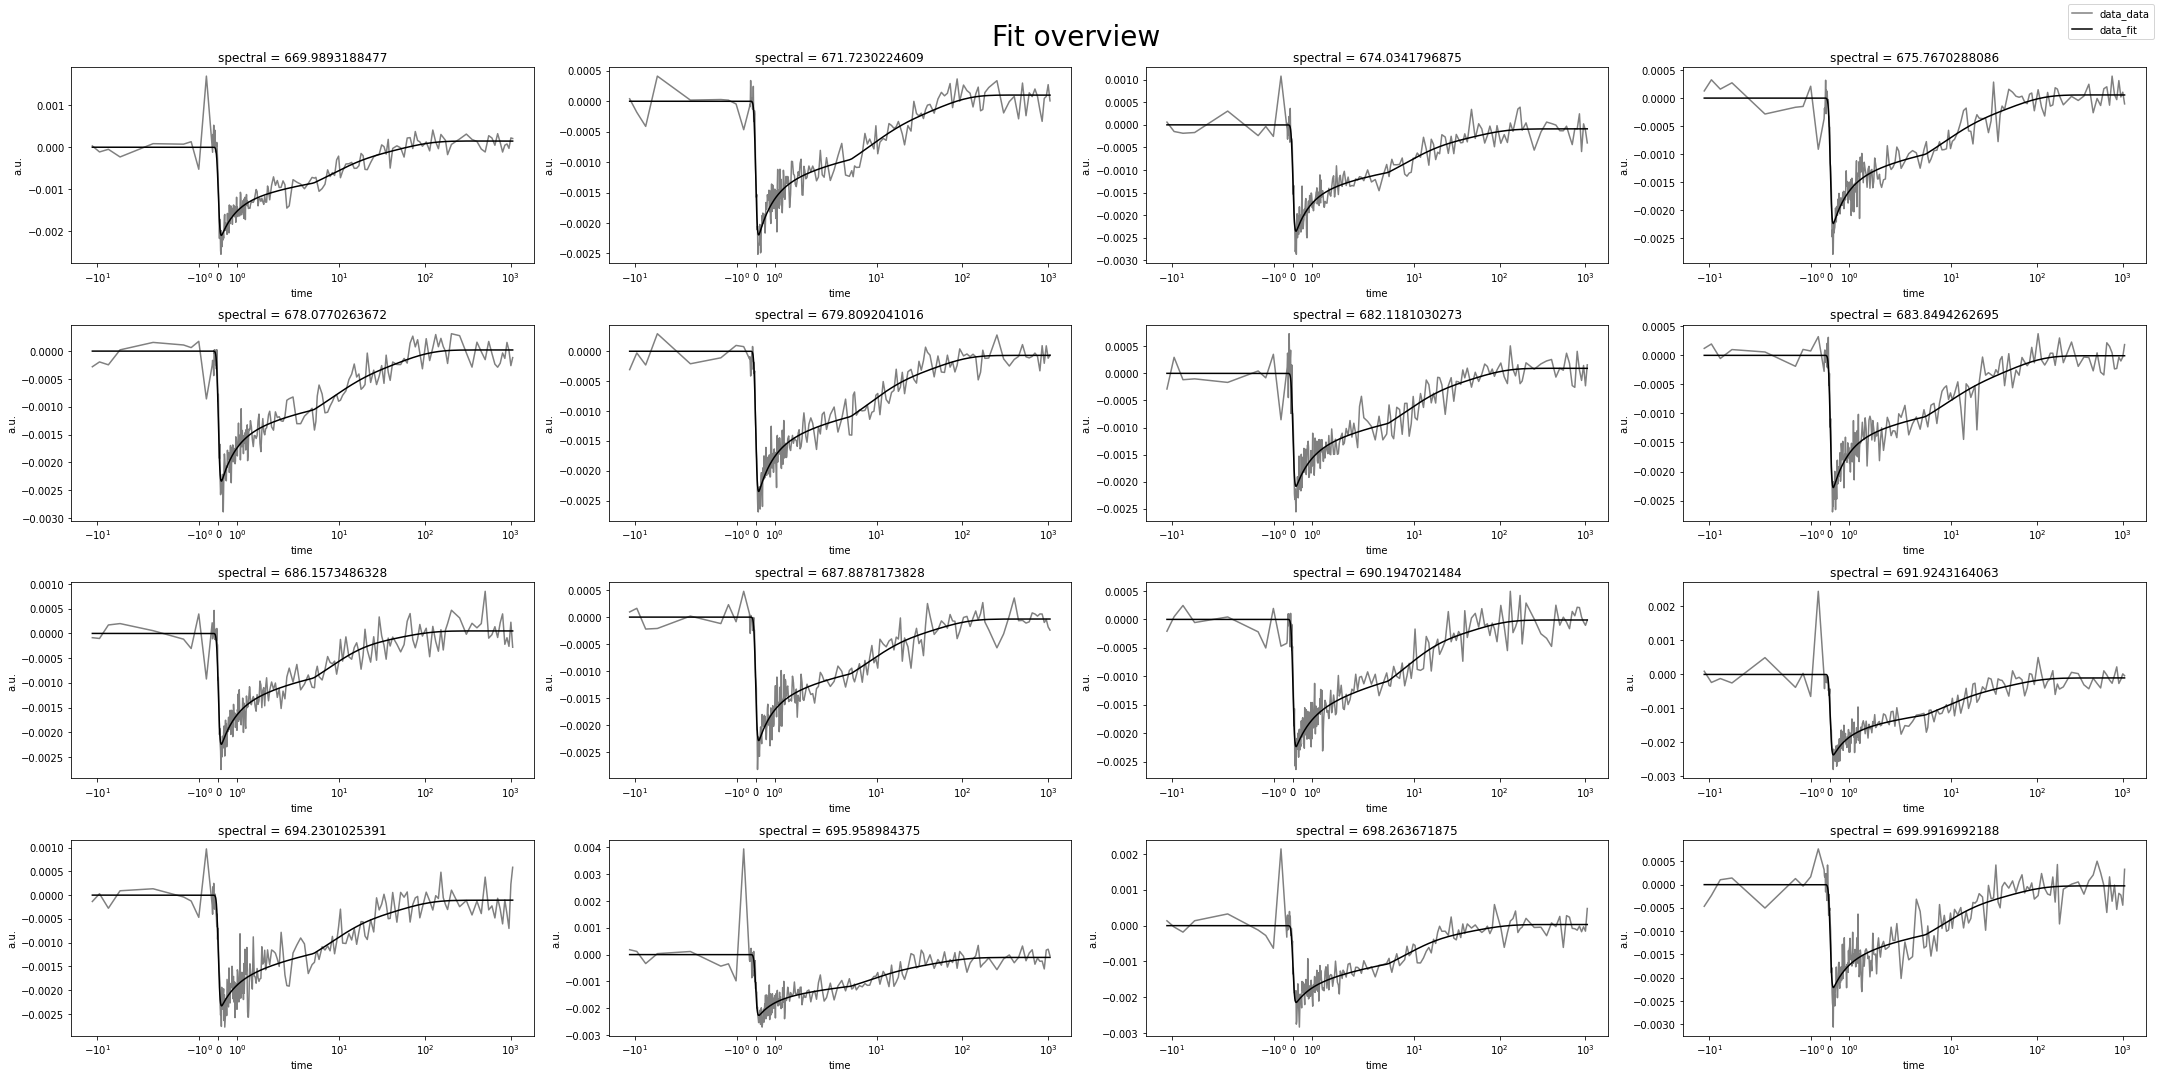

In [11]:
wavelengths = select_plot_wavelengths(global_result.data["data"],wavelength_range=(670, 700))
#wavelength_range控制拟合范围
plot_fitted_traces(global_result, wavelengths,linlog=True, linthresh=5);
#linthresh 绘图呈线性的范围（以避免绘图在零附近趋于无穷大）。

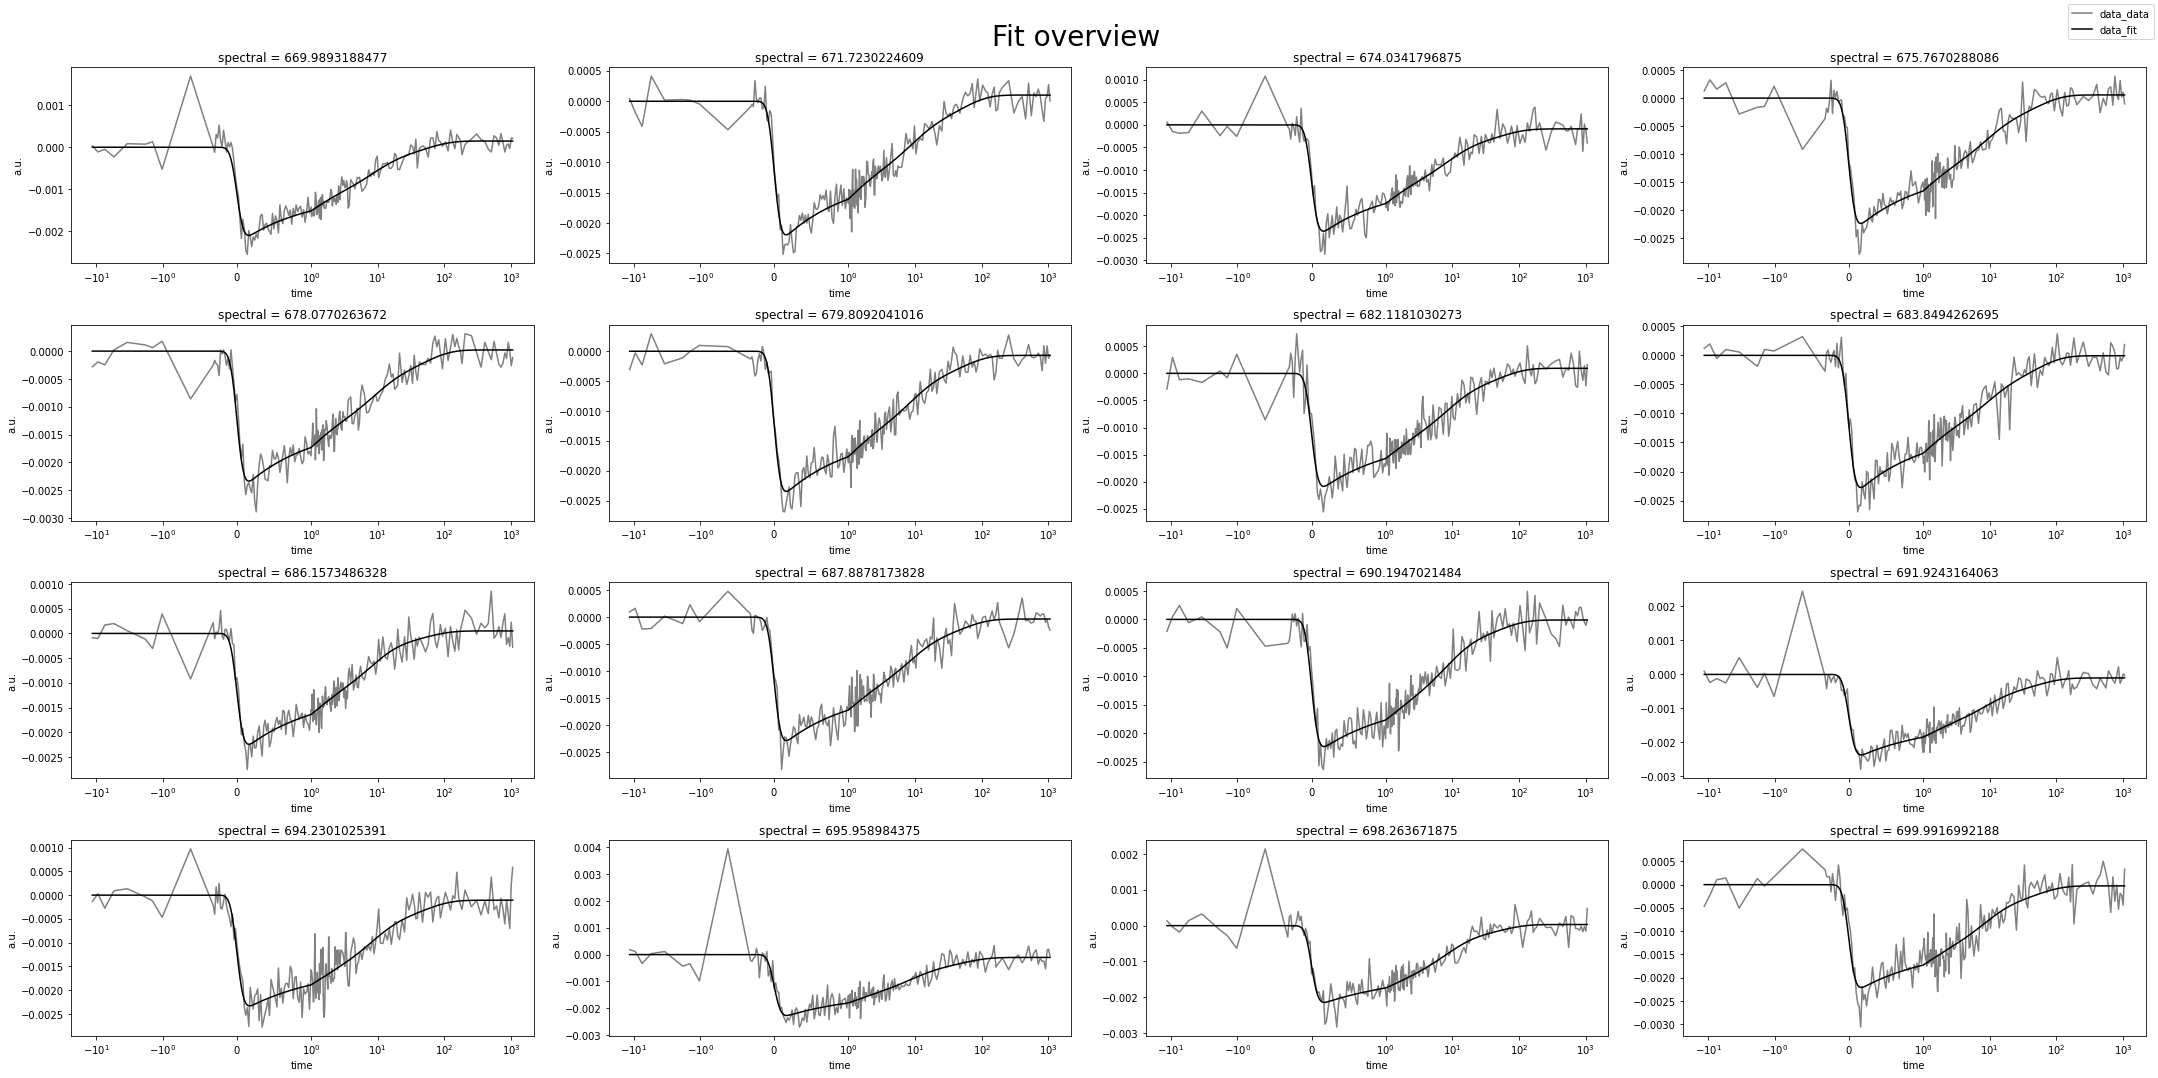

In [12]:
fig_global, axes = plot_fitted_traces(global_result, wavelengths, linlog=True, linthresh=1)

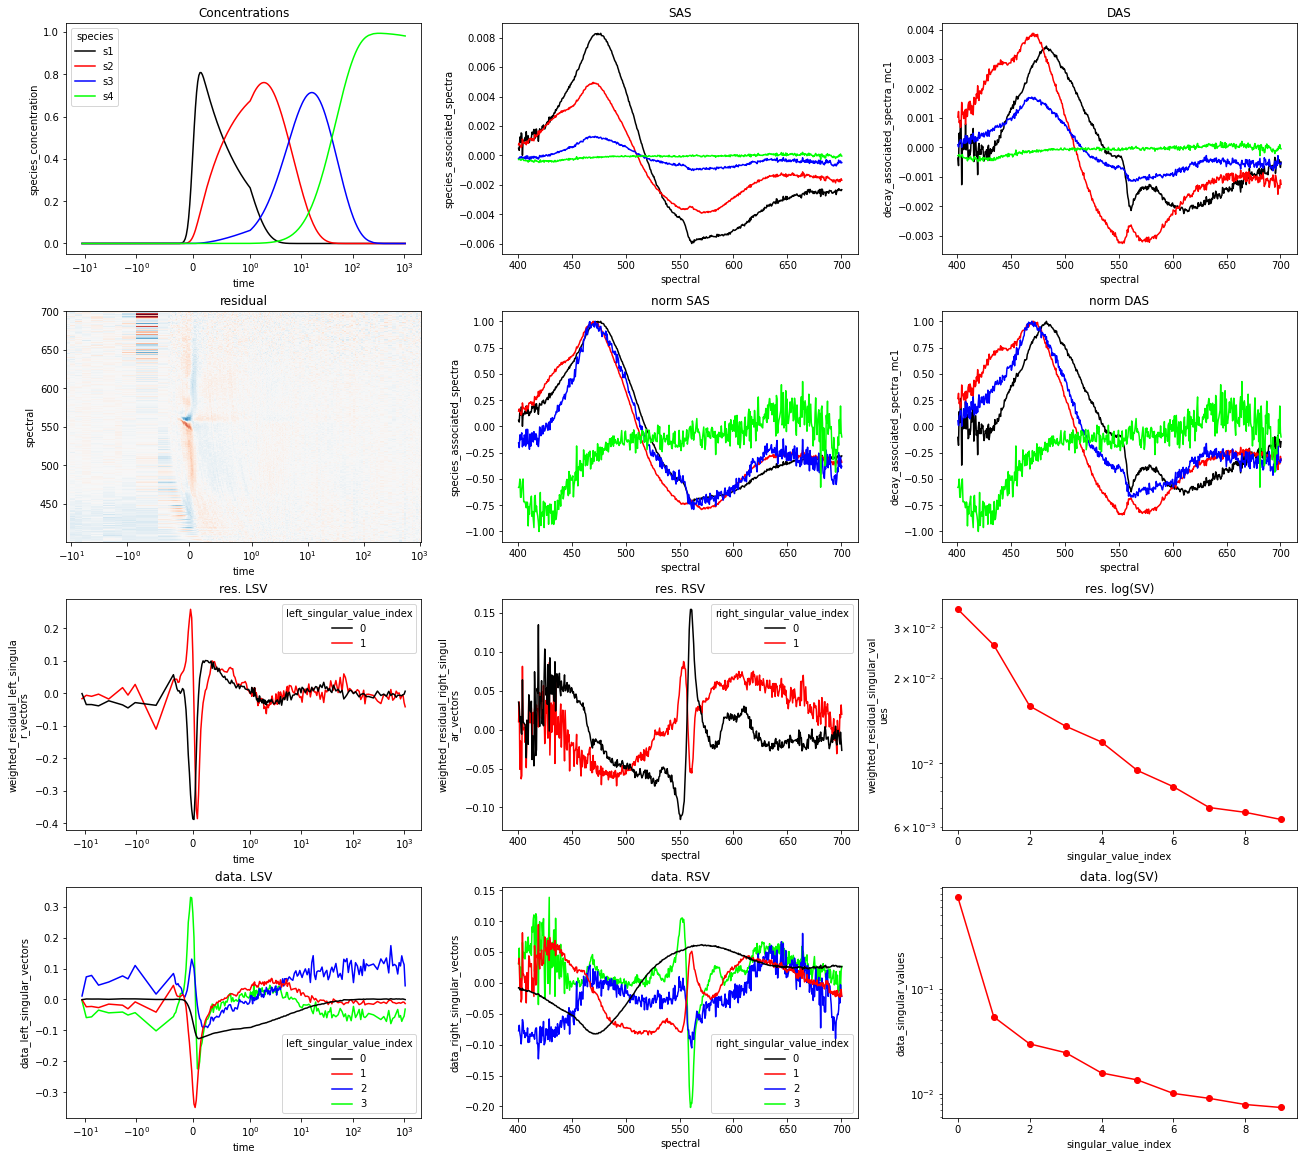

In [13]:
plot_overview(
    global_result,
    linlog=True,
    figure_only=False,
    nr_of_data_svd_vectors=4,
    nr_of_residual_svd_vectors=2,
);

In [14]:
#使用result.get_dataset.获取数据集的结果数据。

result_dataset=global_result.data["data"]
result_dataset

#是一个类似字典的容器，包含有标记的数组(DataArray对象)，其维度是对齐的。
#类似于pandas中的DataFrame


<xarray.Dataset>
Dimensions:                                   (clp_label: 4, time: 217, spectral: 514, left_singular_value_index: 217, singular_value_index: 217, right_singular_value_index: 217, species: 4, component_mc1: 4, species_mc1: 4, to_species_mc1: 4, from_species_mc1: 4)
Coordinates:
  * clp_label                                 (clp_label) object 's1' ... 's4'
  * time                                      (time) float64 -11.45 ... 1.053...
  * spectral                                  (spectral) float64 400.4 ... 700.6
  * species                                   (species) <U2 's1' 's2' 's3' 's4'
  * component_mc1                             (component_mc1) int32 1 2 3 4
    rate_mc1                                  (component_mc1) float64 1.341 ....
    lifetime_mc1                              (component_mc1) float64 0.7456 ...
  * species_mc1                               (species_mc1) <U2 's1' ... 's4'
    initial_concentration_mc1                 (species_mc1) float64 1.0 ... 0.0
  * to_species_mc1                            (to_species_mc1) <U2 's1' ... 's4'
  * from_species_mc1                          (from_species_mc1) <U2 's1' ......
Dimensions without coordinates: left_singular_value_index, singular_value_index, right_singular_value_index
Data variables: (12/25)
    data                                      (time, spectral) float64 0.0 .....
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (spectral, right_singular_value_index) float64 ...
    matrix                                    (time, clp_label) float64 0.0 ....
    clp                                       (spectral, clp_label) float64 0...
    ...                                        ...
    irf_center                                float64 -0.0265
    irf_width                                 float64 0.07075
    decay_associated_spectra_mc1              (spectral, component_mc1) float64 ...
    a_matrix_mc1                              (component_mc1, species_mc1) float64 ...
    k_matrix_mc1                              (to_species_mc1, from_species_mc1) float64 ...
    k_matrix_reduced_mc1                      (to_species_mc1, from_species_mc1) float64 ...
Attributes:
    loader:                           <function load_dataset at 0x0000022E4BB...
    source_path:                      E:/proteinspectrumdeal/TAcsvdata/temp-m...
    global_dimension:                 spectral
    model_dimension:                  time
    root_mean_square_error:           0.00019911046083567548
    weighted_root_mean_square_error:  0.00019911046083567548
    dataset_scale:                    1

In [15]:
#数据的可视化方式与数据集相同。为了判断拟合的质量，应该首先查看残差的左奇异向量和右奇异向量。
#residual_left = result_dataset.residual_left_singular_vectors.sel(left_singular_value_index=0)
#sel
#residual_right = result_dataset.residual_right_singular_vectors.sel(right_singular_value_index=0)
#residual_left.plot.line(x="time", aspect=2, size=5)
#residual_right.plot.line(x="spectral", aspect=3, size=6);

In [16]:
#存取数据
#from glotaran.io import save_dataset
#save_dataset(result_dataset, "M2.nc",allow_overwrite=True)
#das=result_dataset.decay_associated_spectra_mc1.sel(component_mc1=2)
#das=result_dataset.decay_associated_spectra_mc1
#das.plot.line( x="spectral",aspect=2, size=5,xlim=[400,700])


In [17]:
#fig2.savefig("Heat_Capacities\\Strontium.png")
M_das1=result_dataset.decay_associated_spectra_mc1.sel(component_mc1=1)
M_das2=result_dataset.decay_associated_spectra_mc1.sel(component_mc1=2)
M_das3=result_dataset.decay_associated_spectra_mc1.sel(component_mc1=3)
M_das4=result_dataset.decay_associated_spectra_mc1.sel(component_mc1=4)
time=result_dataset.lifetime_mc1

print("------Lifetime[-s]--------")
print( "tau1"+"=""%.2f"%(time.data[0]*1000)+"fs")
print( "tau2"+"=""%.2f"%(time.data[1])+"ps")
print( "tau3"+"=""%.2f"%(time.data[2])+"ps")
print( "tau4"+"=""%.2f"%(time.data[3])+"ps")

------Lifetime[-s]--------
tau1=745.63fs
tau2=6.79ps
tau3=45.00ps
tau4=53106.30ps
